Binary classification to predict whether a person is granted a personal loan(1) or not(0) using BPNN.

link video : https://drive.google.com/drive/folders/1J9tC4koxNdMr-JmDCFhN4ifFEgqys2wv?usp=drive_link

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
import keras
import keras.losses
import keras.metrics
import keras.layers
import keras.optimizers
import keras.activations

# a) Preprocessing

## Problem 1

In [2]:
df = pd.read_csv("Bank_Loan_Granting.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


CCAvg column seems to have an error in formatting, it uses '/' rather than '.' since it is the average monthly credit card spending.


## Problem 2

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


CCAvg data type should be float not an object.

## Problem 3

In [4]:
for i in df.columns:
  print(df[i].value_counts())
  print()

ID
5000    1
1       1
2       1
3       1
4       1
       ..
13      1
12      1
11      1
10      1
9       1
Name: count, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
46    127
45    127
42    126
31    125
55    125
40    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
26     78
64     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 4     113
 2

-problem 3: experience year should not be negative, lowest should be 0.

So the problem are:
1. CCAvg column seems to have an error in formatting, it uses '/' rather than '.' since it is the average monthly credit card spending.
2. CCAvg data type should be float not an object.
3. Experience year should not be negative, lowest should be 0.

## Solution for problem 1

In [5]:
# change "/" to "."
df.CCAvg = df['CCAvg'].str.replace('/','.')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


## Solution for problem 2

In [6]:
# change object to float data type
df['CCAvg'] = df['CCAvg'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Solution for problem 3

In [7]:
# change all experience year lower than 0 to their absolute values
df['Experience'] = np.abs(df['Experience'])
df['Experience'].value_counts()

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
4     113
21    113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: count, dtype: int64

In [8]:
#check if there is still row with experience year below 0
len(df[df['Experience'] < 0])

0

# b) EDA

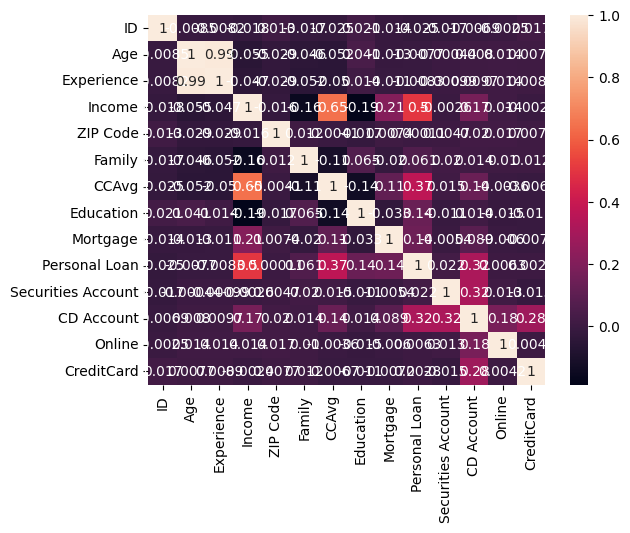

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

There are no highly correlated variables that needs to be removed. We don't want to drop Age and Experience, since they are important information

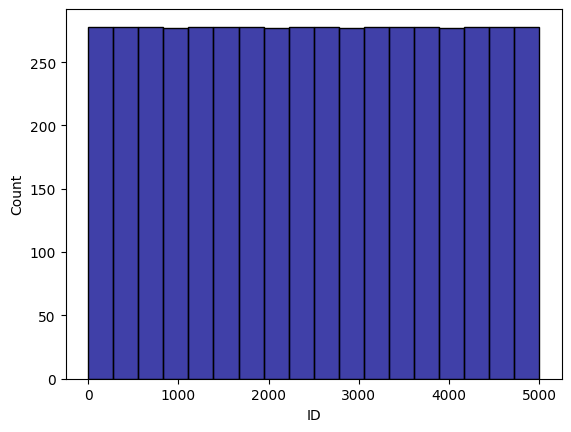

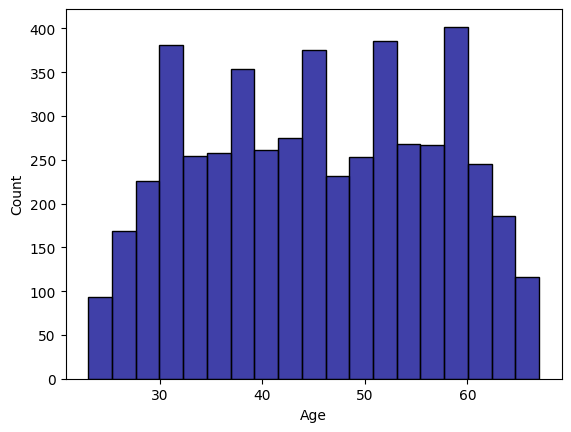

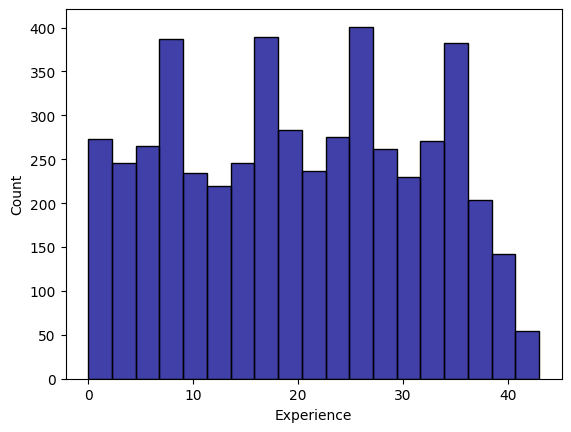

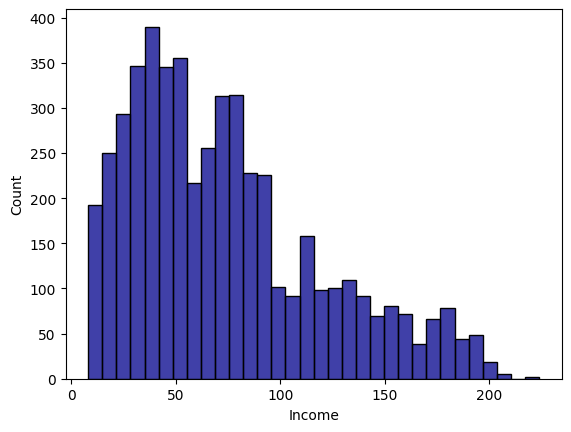

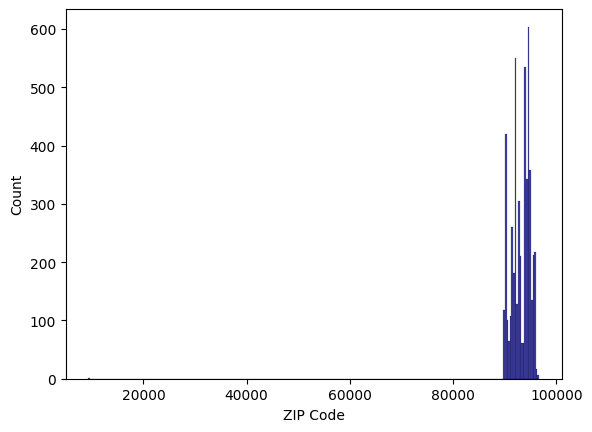

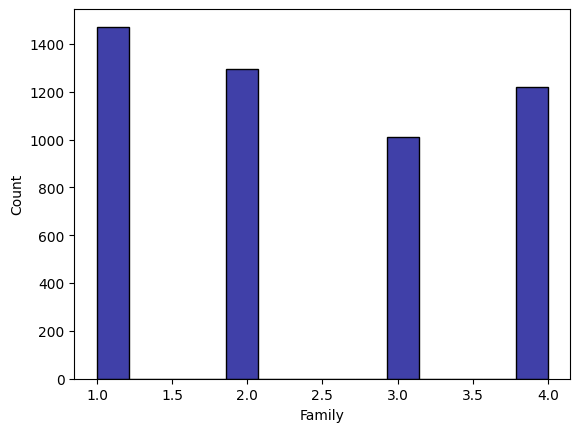

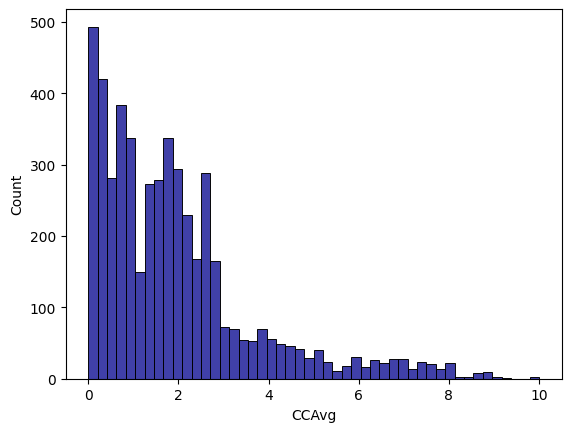

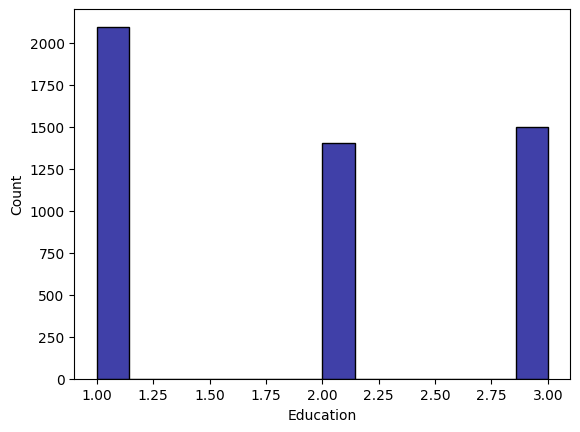

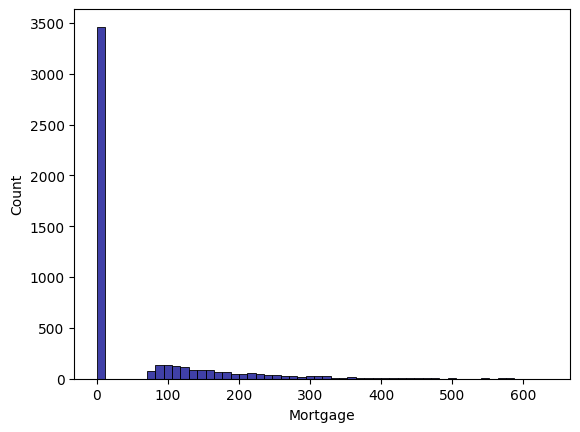

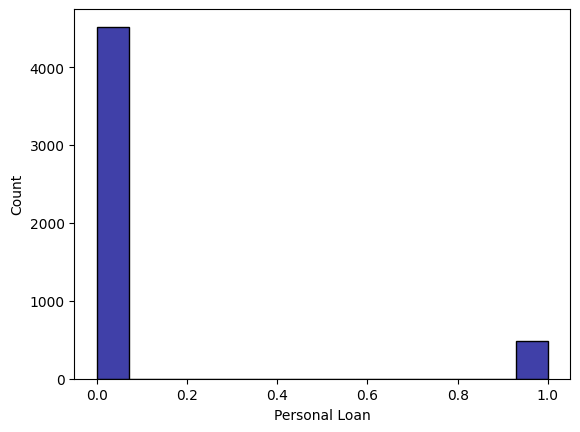

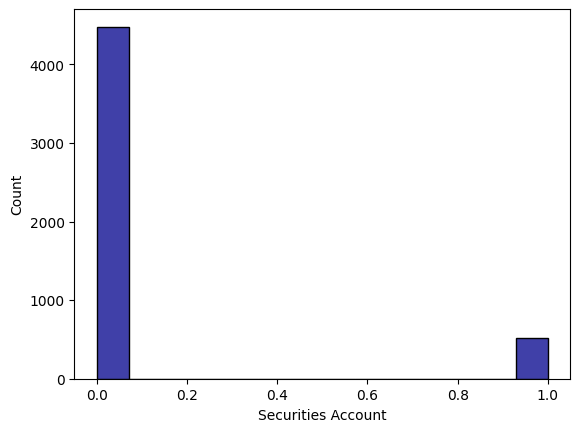

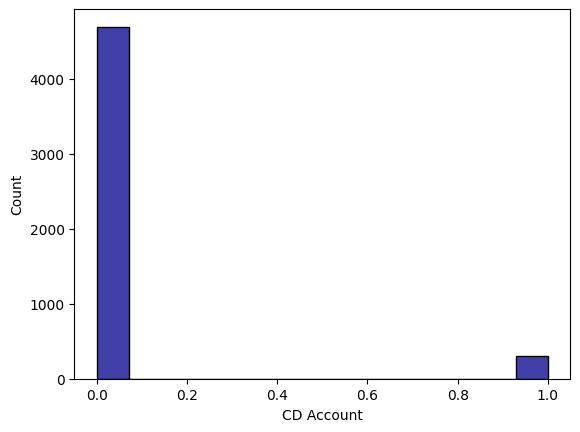

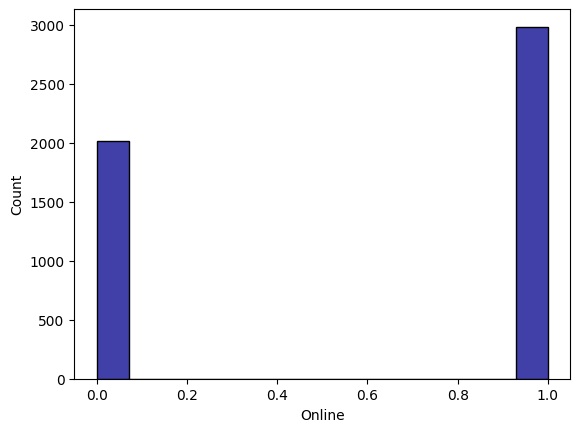

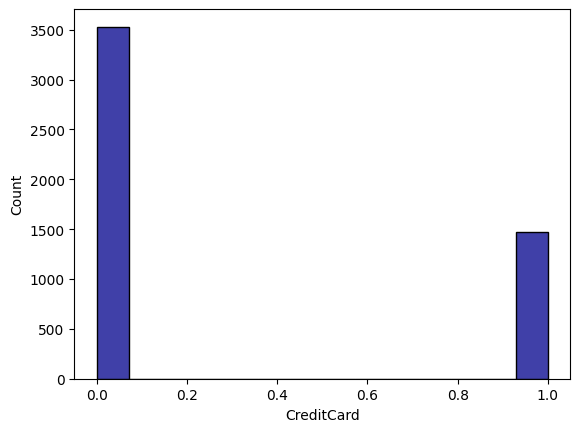

In [10]:
for i in df:
    sns.histplot(data=df, x=i, color='darkblue')
    plt.show()

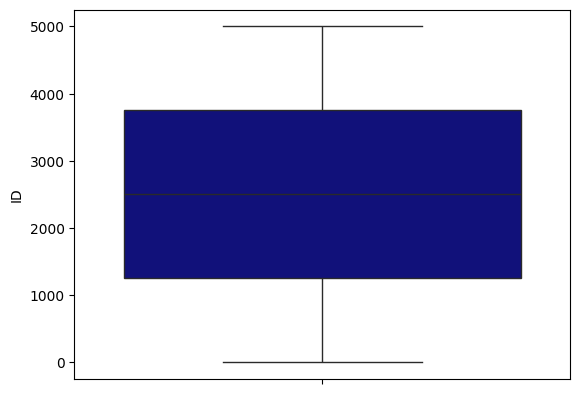

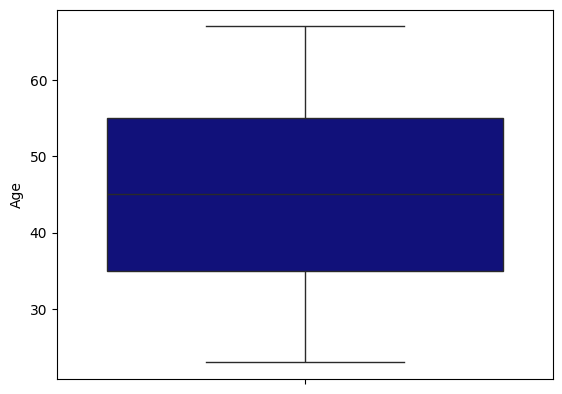

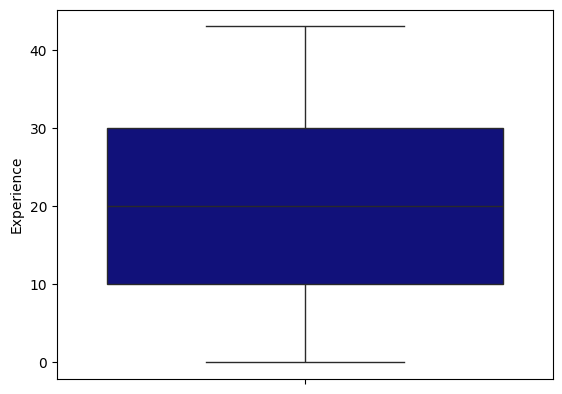

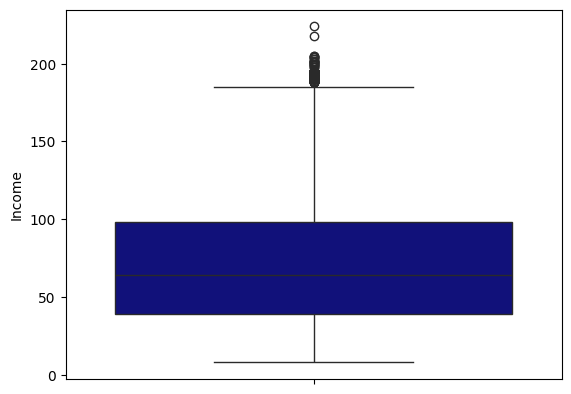

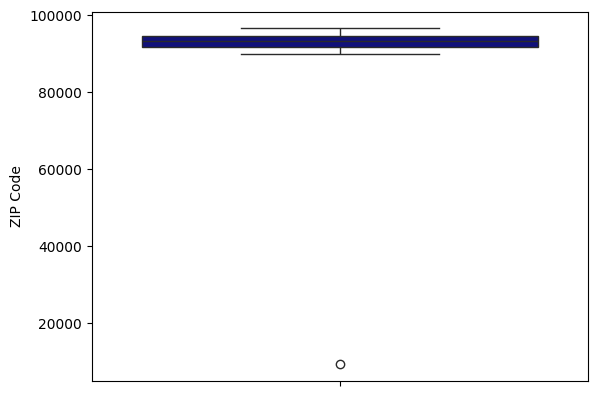

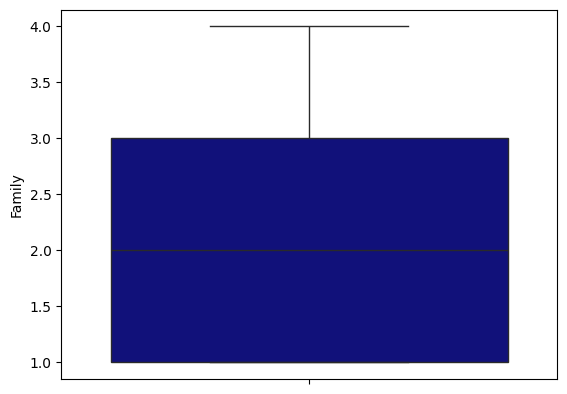

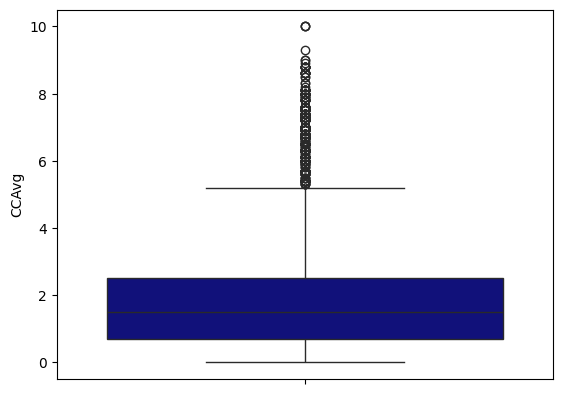

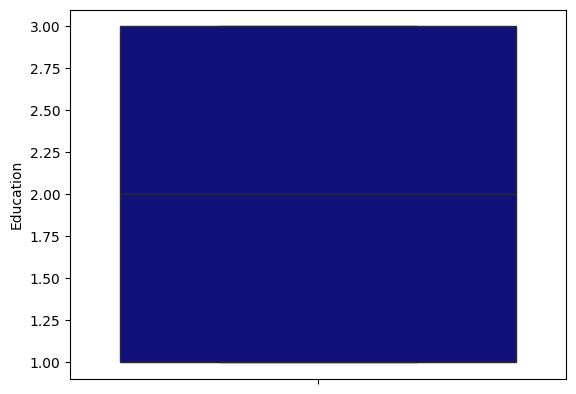

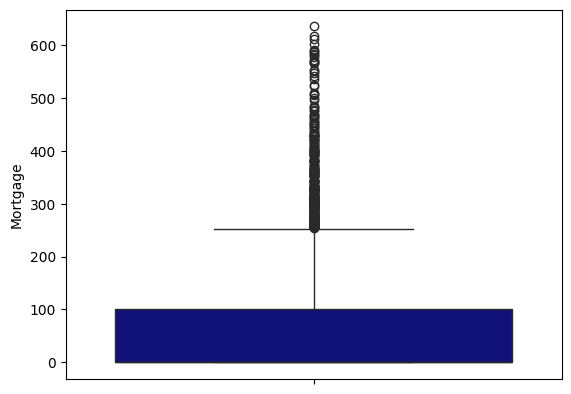

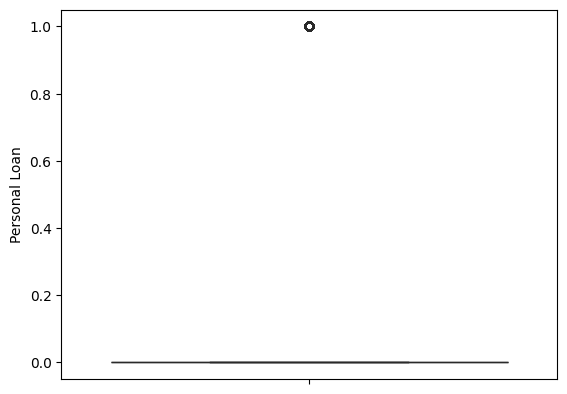

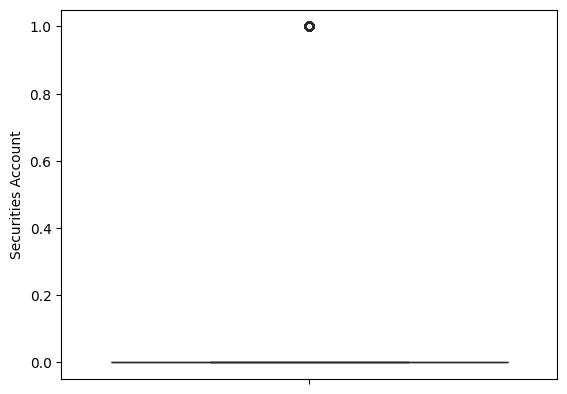

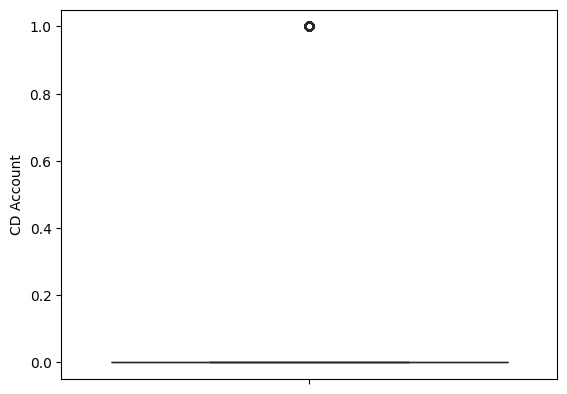

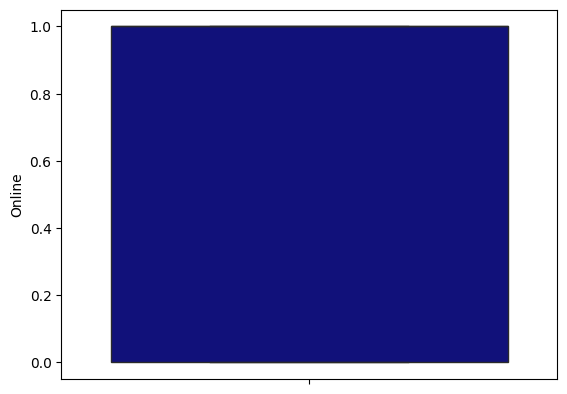

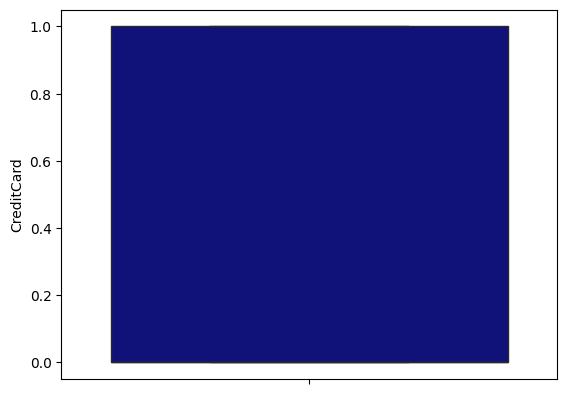

In [11]:
for i in df:
    sns.boxplot(data=df, y=i, color='darkblue')
    plt.show()

From the plot above, we can see that ID is always distinct and unique so we gonna drop it to reduce noise

In [12]:
df = df.drop('ID', axis=1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Splitting to train,test,val

In [13]:
df_size = list(df.shape)
df_input = df.drop('Personal Loan', axis = 1)
df_output = df['Personal Loan']

## Scaling data to reduce bias

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_input = scaler.fit_transform(df_input)

we use robust scaler because it works by removing the median and scales data which is more robust to outliers, while standard scaler works by removing the mean which is bad if we work with data that has outliers


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=42, stratify=df_output)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.1*df_size[0]/len(x_train)), random_state=42, stratify=y_train)

len(x_train), len(x_test), len(x_val)

(4000, 500, 500)

we need to stratify the spiltting because the instability of the class in the target variable

In [16]:
df_output[df_output == 1].count()

np.int64(480)

In [17]:
y_train[y_train == 1].count() / 480

np.float64(0.8)

In [18]:
y_test[y_test == 1].count() / 480

np.float64(0.1)

In [19]:
y_val[y_val == 1].count() / 480

np.float64(0.1)

In [20]:
for i in df.columns:
  print(df[i].value_counts())
  print()

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
46    127
45    127
42    126
31    125
55    125
40    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
26     78
64     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
4     113
21    113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: count, dtype: int64

Income
44     85
38     84
81     83
41  

# c)

Kualitas data: Data memiliki data kotor dan hilang di mana Experience memiliki nilai negatif dan CCAvg memiliki simbol yang salah, yang seharusnya memakai tanda '.' malah memakai tanda '/' padahal dia itu merupakan rata-rata dari pengeluaran credit card perbulannya, juga ada banyak outlier yang bisa kita lihat melalui boxplot pada kolom seperti Income, CCAvg, Mortgage, dan lainnya.

Jenis data: Data yang ada besifat heterogen karena masing-masing kolom memiliki definisi dan tujuan yang berbeda sehingga hanya satu kolom yang harus kita hapus karena semua elemen dalam kolom tersebut berbeda yaitu kolom ID. Lalu, data ini juga perlu discale karena adanya perbedaan satuan untuk mengurangi bias pada data, seperti zip code yang tidak ada satuan, dan jenis mata uang yang tidak diketahui.

Ketidakseimbangan kelas: Terdapat beberapa ketidakseimbangan kelas pada beberapa kolom biner, yaitu pada kolom Personal Loan, Securities Account, CD Account, dan CreditCard. Hanya kolom CreditCard yang tidak terlalu ketara imbalancenya. Selain kolom yang biner, imbalance tidak perlu dipaparkan.

# d) arsitektur baseline

In [21]:
n = 12
num_class = 2

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(n,)))
model.add(keras.layers.Dense(n*2, activation='relu'))
model.add(keras.layers.Dense(n*2, activation='relu'))
model.add(keras.layers.Dense(num_class, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 962 (3.76 KB)

 Trainable params: 962 (3.76 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
plot_model(model,show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [23]:
history = model.fit(x_train, y_train, epochs = 200, verbose = 2, validation_data=(x_val, y_val))

Epoch 1/200
125/125 - 2s - 13ms/step - loss: 0.3151 - sparse_categorical_accuracy: 0.8992 - val_loss: 0.1764 - val_sparse_categorical_accuracy: 0.9140
Epoch 2/200
125/125 - 0s - 3ms/step - loss: 0.1603 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.1201 - val_sparse_categorical_accuracy: 0.9580
Epoch 3/200
125/125 - 0s - 2ms/step - loss: 0.1230 - sparse_categorical_accuracy: 0.9570 - val_loss: 0.1003 - val_sparse_categorical_accuracy: 0.9660
Epoch 4/200
125/125 - 0s - 2ms/step - loss: 0.1046 - sparse_categorical_accuracy: 0.9638 - val_loss: 0.0914 - val_sparse_categorical_accuracy: 0.9680
Epoch 5/200
125/125 - 0s - 2ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.0858 - val_sparse_categorical_accuracy: 0.9720
Epoch 6/200
125/125 - 0s - 3ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9720 - val_loss: 0.0829 - val_sparse_categorical_accuracy: 0.9700
Epoch 7/200
125/125 - 0s - 2ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9728 - val_loss

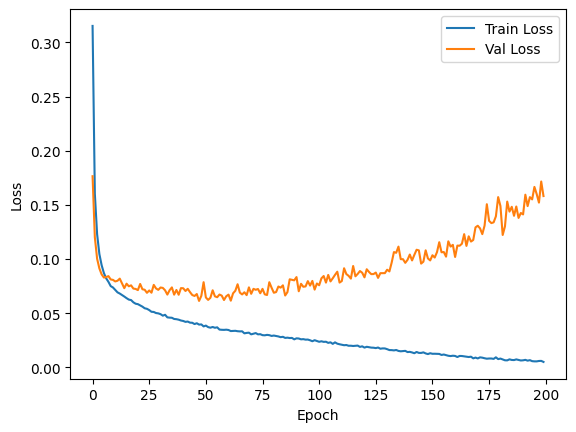

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [25]:
#prediction
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
#evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       452
           1       0.91      0.88      0.89        48

    accuracy                           0.98       500
   macro avg       0.95      0.93      0.94       500
weighted avg       0.98      0.98      0.98       500



0.933075221238938


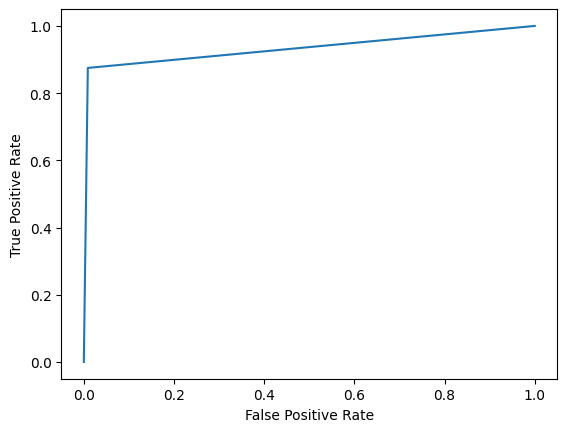

In [27]:
#auc and roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, y_pred))
plt.show()

# e) hypertuning

In [ ]:
import keras.activations
import keras.optimizers


params = {

    'nn': [12, 24, 36, 48, 60], # Number of Networks
    'epochs': [200],
    'optimizer':[

        tf.keras.optimizers.legacy.Adam(),
        tf.keras.optimizers.legacy.SGD(),
        tf.keras.optimizers.legacy.RMSprop()

    ],

    'output': [1, 2]

}

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

In [30]:
def modelling(nn, epochs, optimizer, output):
    model = keras.models.Sequential()
    model.add(tf.keras.Input(shape=(12,)))
    model.add(keras.layers.Dense(nn, activation='relu'))
    model.add(keras.layers.Dense(nn, activation='relu'))
    model.add(keras.layers.Dense(output, activation='sigmoid'))

    if output == 2:
        model.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy()])
    elif output == 1:
        model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

    history = model.fit(x_train, y_train, epochs = epochs, verbose = 0, validation_data=(x_val, y_val))
    train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    sample_train_loss_mean = np.mean(history.history['loss'][epochs-11:epochs-1]) #samples the last 10 train loss
    sample_val_loss_mean = np.mean(history.history['val_loss'][epochs-11:epochs-1]) #samples the last 10 validation loss

    return model, history, [sample_train_loss_mean, sample_val_loss_mean], [train_accuracy, test_accuracy]

In [31]:
import itertools

param = list(itertools.product(*params.values()))
best_param = None
min_loss = [1000, 1000] #train_loss, val_loss
best_score = [-1000, -1000] #train_accuracy, test_accuracy

best_model = None
best_history = []

treshold = 0.02
loss_treshold = 0.01

for i in range(len(param)):
    model, history, loss, score = modelling(param[i][0], param[i][1], param[i][2], param[i][3])

    print(f'Parameters: {param[i]}')
    print(f'Loss and score: {loss, score}\n')

    if(score[0] > best_score[0] and score[1] > best_score[1] and np.abs(score[0] - best_score[0]) > treshold and np.abs(score[1] - best_score[1]) > treshold and np.abs(loss[0] - loss[1]) < loss_treshold):
        best_score = score.copy()
        min_loss = loss.copy()
        best_param = [param[i][0], param[i][1], param[i][2], param[i][3]]
        best_model = model
        best_history = history
        print(f'Current best param: {best_score, min_loss, best_param}\n')

    elif(score[0] > best_score[0] and score[1] > best_score[1] and np.abs(loss[0] - min_loss[0]) <= loss_treshold and np.abs(loss[1] - min_loss[1]) <= loss_treshold and np.abs(loss[0] - loss[1]) < loss_treshold):
        best_score = score.copy()
        min_loss = loss.copy()
        best_param = [param[i][0], param[i][1], param[i][2], param[i][3]]
        best_model = model
        best_history = history
        print(f'Current best param: {best_score, min_loss, best_param}\n')

    elif(loss[0] < min_loss[0] and loss[1] < min_loss[1] and np.abs(score[0] - best_score[0]) < treshold and np.abs(score[1] - best_score[1]) < treshold and np.abs(loss[0] - loss[1]) < loss_treshold):

        best_score = score.copy()
        min_loss = loss.copy()
        best_param = [param[i][0], param[i][1], param[i][2], param[i][3]]
        best_model = model
        best_history = history
        print(f'Current best param: {best_score, min_loss, best_param}\n')

print(best_score)
print(best_param)

Parameters: (12, 200, <keras.src.optimizers.adam.Adam object at 0x00000127902838F0>, 1)
Loss and score: ([np.float64(0.023660198040306567), np.float64(0.043487508594989774)], [0.9915000200271606, 0.984000027179718])



ValueError: Unknown variable: <KerasVariable shape=(12, 12), dtype=float32, path=sequential_2/dense_6/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

On the current run, the best parameter is using 24 neurons on 200 epochs, SGD optimizer and 2 output neurons.

In [ ]:
hypertuned_model = best_model
hypertuned_history = best_history

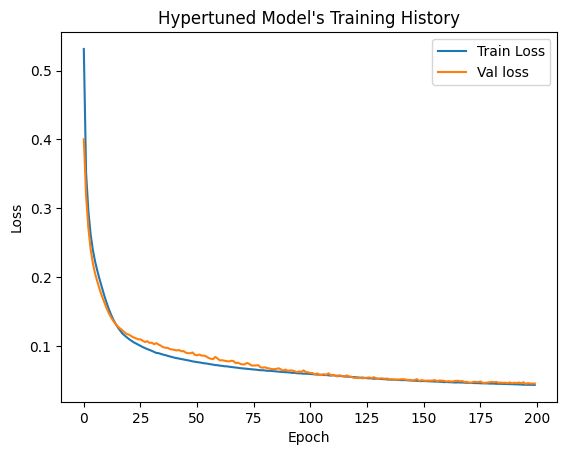

In [ ]:
hypertuned_train_loss = hypertuned_history.history['loss']
hypertuned_val_loss = hypertuned_history.history['val_loss']

plt.plot(hypertuned_train_loss, label = 'Train Loss')
plt.plot(hypertuned_val_loss, label = 'Val loss')
plt.title('Hypertuned Model\'s Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
hypertuned_y_pred = hypertuned_model.predict(x_test)
hypertuned_y_pred = np.argmax(hypertuned_y_pred, axis = 1)
hypertuned_y_pred

16/16 [==============================] - 0s 2ms/step


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(classification_report(y_test, hypertuned_y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       452
           1       0.91      1.00      0.95        48

    accuracy                           0.99       500
   macro avg       0.95      0.99      0.97       500
weighted avg       0.99      0.99      0.99       500



0.9944690265486726


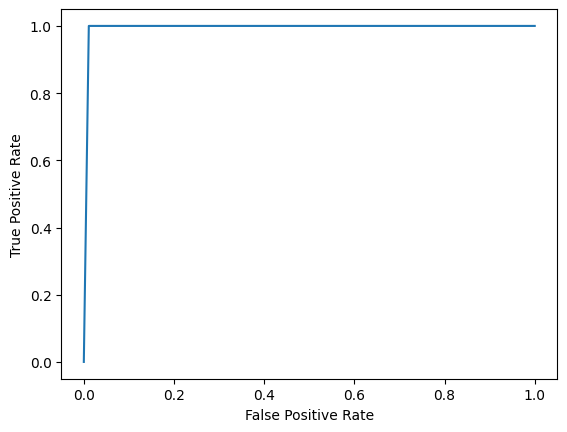

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, hypertuned_y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, hypertuned_y_pred))
plt.show()

Regularized Hypertuned Model => Only used when the hypertuned model overfits

# f) model's evaluation

## model 1(d)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       452
           1       0.85      0.94      0.89        48

    accuracy                           0.98       500
   macro avg       0.92      0.96      0.94       500
weighted avg       0.98      0.98      0.98       500



## model 2(e)

In [ ]:
print(classification_report(y_test, hypertuned_y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       452
           1       0.91      1.00      0.95        48

    accuracy                           0.99       500
   macro avg       0.95      0.99      0.97       500
weighted avg       0.99      0.99      0.99       500

